unit8 인구 구조를 다양한 형태로 시각화하기

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<BarContainer object of 10 artists>

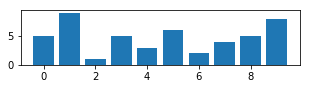

In [15]:
# 막대 그래프(x, y)
plt.figure(figsize=(5,1))
plt.bar(np.arange(10), np.random.randint(1,10, size=10))

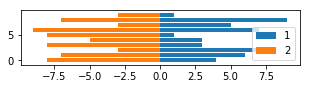

In [16]:
# 막대 그래프(x, y) # bar horizontal : 수평막대그래프
plt.figure(figsize=(5,1))
plt.barh(np.arange(10), np.random.randint(1,10, size=10), label='1') 
plt.barh(np.arange(10), - np.random.randint(1,10, size=10), label='2') 
plt.legend()

In [17]:
import pandas as pd
df = pd.read_csv('gender_5.csv', encoding='cp949')
#df = df.dropna()  # 전처리 : Nat data를 Drop함: 누락된 값이 있으면 그 행은 버림
#df.head()
#df.shape

In [18]:
# 특정 도시의 여성과 서울특별시 강남구 개포1동 남성의 나이별 인구수 대조
# 컬럼 위치 찾기 : 남 0세~남100세, 여 0세~여100세
# 0세, 1세, ... 도시에서 모두 누적 -> 막대 그래프로 표현

In [19]:
#df.columns
max_age = 99
city = '서울특별시 강남구 개포1동'
man_0 = '2019년05월_남_0세'
woman_0 = '2019년05월_여_0세'
#type(list(df.columns))
columns = list(df.columns)
man_0_index = columns.index(man_0)
woman_0_index = columns.index(woman_0)
columns[man_0_index], columns[man_0_index + max_age]
columns[woman_0_index], columns[woman_0_index + max_age]

('2019년05월_여_0세', '2019년05월_여_99세')

In [20]:
data=np.array(df)
area = data[:,0]
#area

In [21]:
city_row_index = -1

for i in range(len(area)) :
    if city in area[i]:
        city_row_index = i

city_data = data[city_row_index] # 특정 도시 데이터
city_man = city_data[man_0_index:man_0_index + max_age].astype(np.int)
city_woman = city_data[woman_0_index:woman_0_index + max_age].astype(np.int)
city_man.shape, city_woman.shape

((99,), (99,))

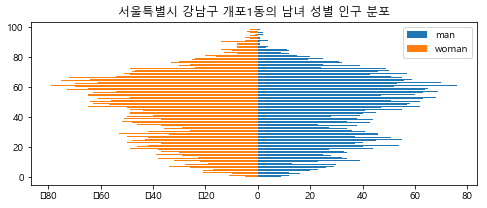

In [22]:
plt.figure(figsize=(8,3))
plt.rc('font', family='Malgun Gothic')
plt.title(city + '의 남녀 성별 인구 분포')
m = plt.barh(np.arange(len(city_man)), city_man, label='man')
m = plt.barh(np.arange(len(city_woman)), -city_woman, label='woman')
m = plt.legend()

In [23]:
# 특정 지역에 대해서 인구 조사
import pandas as pd
df = pd.read_csv('gender_5.csv', encoding='cp949')
df = df.replace(',','',regex=True)
data = np.array(df)
area = data[:,0]
area

array(['서울특별시  (1100000000)', '서울특별시 종로구 (1111000000)',
       '서울특별시 종로구 청운효자동(1111051500)', ..., '제주특별자치도 서귀포시 대천동(5013060000)',
       '제주특별자치도 서귀포시 중문동(5013061000)', '제주특별자치도 서귀포시 예래동(5013062000)'],
      dtype=object)

In [24]:
max_age = 100
man_0 = '2019년05월_남_0세'
woman_0 = '2019년05월_여_0세'
#type(list(df.columns))
columns = list(df.columns)
man_0_index = columns.index(man_0)
woman_0_index = columns.index(woman_0)
columns[man_0_index], columns[man_0_index + max_age]
columns[woman_0_index], columns[woman_0_index + max_age]

('2019년05월_여_0세', '2019년05월_여_100세 이상')

In [25]:
city = '제주특별자치도' # 이 글자가 들어간 행은 전부 찾자, 조건부 검색, 마스크
is_contain = []
for i in range(len(area)) :
    is_contain.append(city in area[i])
#len(area), np.mean(is_contain)
city_data = data[is_contain]

In [26]:
city_man = city_data[:,man_0_index:man_0_index + max_age].astype(np.int)
city_woman = city_data[:,woman_0_index:woman_0_index + max_age].astype(np.int)

In [27]:
city_man = np.sum(city_man, axis=0)
city_woman = np.sum(city_woman, axis=0)

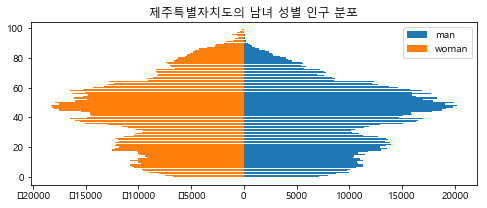

In [28]:
plt.figure(figsize=(8,3))
plt.rc('font', family='Malgun Gothic')
plt.title(city + '의 남녀 성별 인구 분포')
m = plt.barh(np.arange(len(city_man)), city_man, label='man')
m = plt.barh(np.arange(len(city_woman)), -city_woman, label='woman')
m = plt.legend()

In [31]:
np.sum(city_man),np.sum(city_woman)

(1010064, 997137)

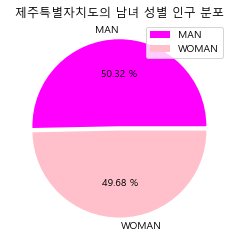

In [40]:
#P139
plt.title(city + '의 남녀 성별 인구 분포')
color = ['magenta', 'pink']
n = plt.pie([np.sum(city_man),np.sum(city_woman)], colors=color, 
            labels=['MAN','WOMAN'], autopct='%.2f %%', explode=(0.05,0))
n = plt.legend()

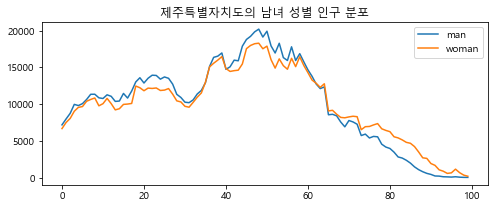

In [43]:
#p142
plt.figure(figsize=(8,3))
plt.rc('font', family='Malgun Gothic')
plt.title(city + '의 남녀 성별 인구 분포')
m = plt.plot(city_man, label='man')
m = plt.plot(city_woman, label='woman')
m = plt.legend()

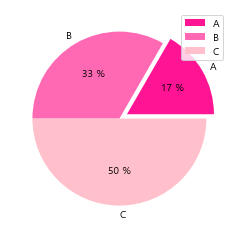

In [29]:
# p130
color = ['deeppink', 'hotpink', 'pink']
n = plt.pie([10,20,30], labels=['A', 'B', 'C'], colors=color,
            autopct='%.0f %%', explode=(0.1,0,0))
n = plt.legend()

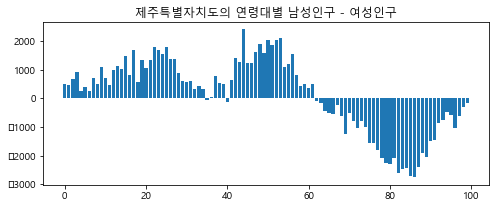

In [48]:
# p144
plt.figure(figsize=(8,3))
plt.rc('font', family='Malgun Gothic')
plt.title(city + '의 연령대별 남성인구 - 여성인구')
m = plt.bar(np.arange(len(city_man)), city_man-city_woman)
#m = plt.bar(np.arange(len(city_woman)), -city_woman, label='woman')
#m = plt.legend()

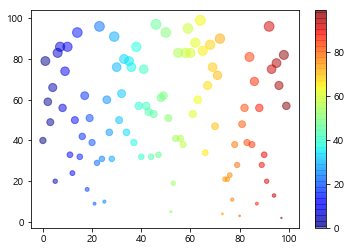

In [60]:
#p144 산점도 (Scatter) : 산개할 산, 점 점, 그림 도
#p146 ~ 152
color=['red','blue','green','gold']
y = np.random.randint(0,100, size=100)
#m = plt.scatter([1,2,3,4], [10,40,30,50], s=[10,30,50,70],
#                c=range(4), cmap='jet')  # alpha는 투명도
m = plt.scatter(np.arange(len(y)),y,s=y, c=range(len(y)), cmap='jet',
               alpha=0.5) 
m = plt.colorbar()

## 그래프
- plot(x), plot(x,y) 선
- hist(x) 히스토그램
- boxplot(x) 박스 : 분포
- bar(x,y) barh(x, y) 막대그래프
- pie(x)
- scatter(x, y) 산점도
- => <ul> unordered list tag 로 표현
